# LASSO

LASSO is the name for $\ell_1$-regularized least squares regression:

<p>
$$\frac1{2m}\|Ax-b\|^2 + \alpha\|x\|_1$$
</p>

We will see that LASSO is able to fine *sparse* solutions if they exist. This is a common motivation for using an $\ell_1$-regularizer.

In [12]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

np.random.seed(606)

kwargs = {'linewidth' : 3.5}
font = {'weight' : 'normal', 'size'   : 24}
matplotlib.rc('font', **font)

def error_plot(ys, yscale='log'):
    plt.figure(figsize=(8, 8))
    plt.xlabel('Step')
    plt.ylabel('Error')
    plt.yscale(yscale)
    plt.plot(range(len(ys)), ys, **kwargs)

def gradient_descent(init, steps, grad, proj=lambda x: x):
    """Projected gradient descent.
    
    Inputs:
        initial: starting point
        steps: list of scalar step sizes
        grad: function mapping points to gradients
        proj (optional): function mapping points to points
        
    Returns:
        List of all points computed by projected gradient descent.
    """
    xs = [init]
    for step in steps:
        xs.append(proj(xs[-1] - step * grad(xs[-1])))
    return xs

def least_squares(A, b, x):
    """Least squares objective."""
    return (0.5/m) * np.linalg.norm(A.dot(x)-b)**2

def least_squares_gradient(A, b, x):
    """Gradient of least squares objective at x."""
    return A.T.dot(A.dot(x)-b)/m

In [13]:
def lasso(A, b, x, alpha=0.1):
    return least_squares(A, b, x) + alpha * np.linalg.norm(x, 1)

def ell1_subgradient(x):
    """Subgradient of the ell1-norm at x."""
    ###
    ### YOUR CODE
    ###
    return g

def lasso_subgradient(A, b, x, alpha=0.1):
    """Subgradient of the lasso objective at x"""
    return least_squares_gradient(A, b, x) + alpha*ell1_subgradient(x)

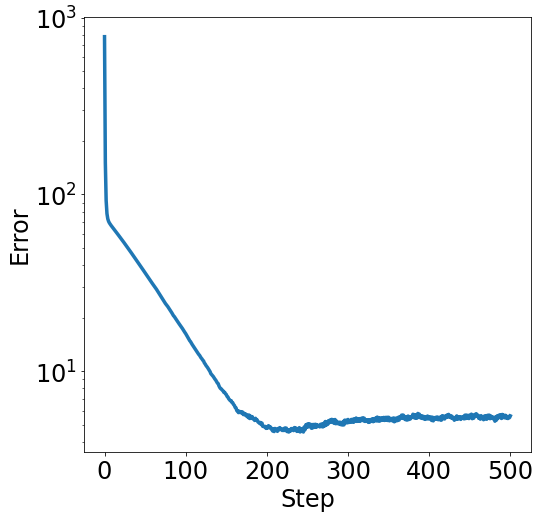

In [14]:
m, n = 100, 1000
A = np.random.normal(0, 1, (m, n))
x_opt = np.zeros(n)
x_opt[:10] = 1.0
b = A.dot(x_opt)
x0 = np.random.normal(0, 1, n)
xs = gradient_descent(x0, [0.1]*500, lambda x: lasso_subgradient(A, b, x))
error_plot([lasso(A, b, x) for x in xs])

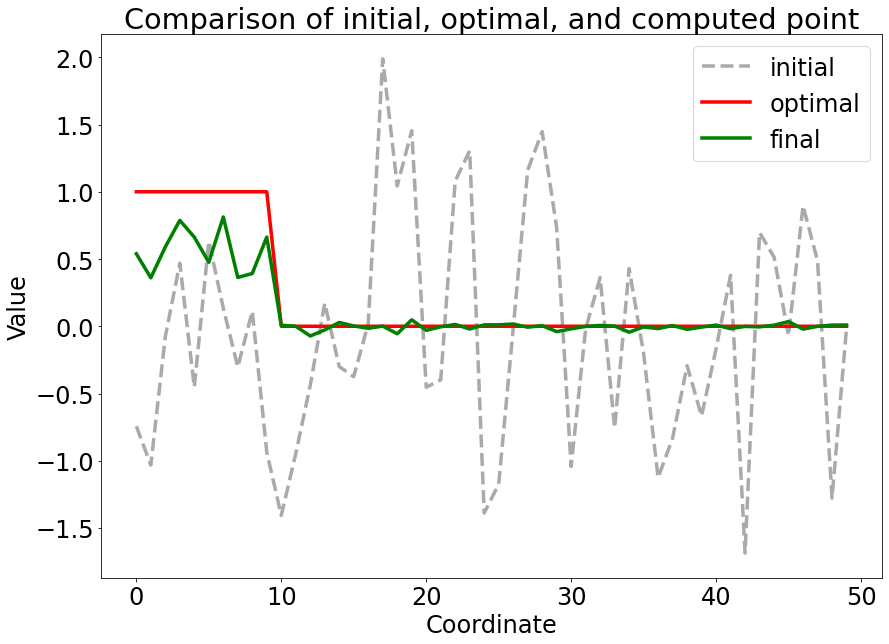

In [15]:
plt.figure(figsize=(14,10))
plt.title('Comparison of initial, optimal, and computed point')
idxs = range(50)
plt.plot(idxs, x0[idxs], '--', color='#aaaaaa', label='initial', **kwargs)
plt.plot(idxs, x_opt[idxs], 'r-', label='optimal', **kwargs)
plt.plot(idxs, xs[-1][idxs], 'g-', label='final', **kwargs)
plt.xlabel('Coordinate')
plt.ylabel('Value')
plt.legend()

As promised, LASSO correctly identifies the significant coordinates of the optimal solution. This is why, in practice, LASSO is a popular tool for feature selection.

Play around with this plot to inspect other points along the way, e.g., the point that achieves lowest objective value. Why does the objective value go up even though we continue to get better solutions?

<a id="svm"></a>
## Support Vector Machines

In a linear classification problem, we're given $m$ labeled points $(a_i, y_i)$ and we wish to find a hyperplane given by a point $x$ that separates them so that 

* $\langle a_i, x\rangle \ge 1$ when $y_i=1$, and 
* $\langle a_i, x\rangle \le -1$ when $y_i = -1$

The smaller the norm $\|x\|$ the larger the *margin* between positive and negative instances. Therefore, it makes sense to throw in a regularizer that penalizes large norms. This leads to the objective.

<p>
$$\frac 1m \sum_{i=1}^m \max\{1-y_i(a_i^\top x), 0\} + \frac{\alpha}2\|x\|^2$$
</p>

In [ ]:
def hinge_loss(z):
    return np.maximum(1.-z, np.zeros(z.shape))

def svm_objective(A, y, x, alpha=0.1):
    """SVM objective."""
    m, _ = A.shape
    return np.mean(hinge_loss(np.diag(y).dot(A.dot(x))))+(alpha/2)*x.dot(x)

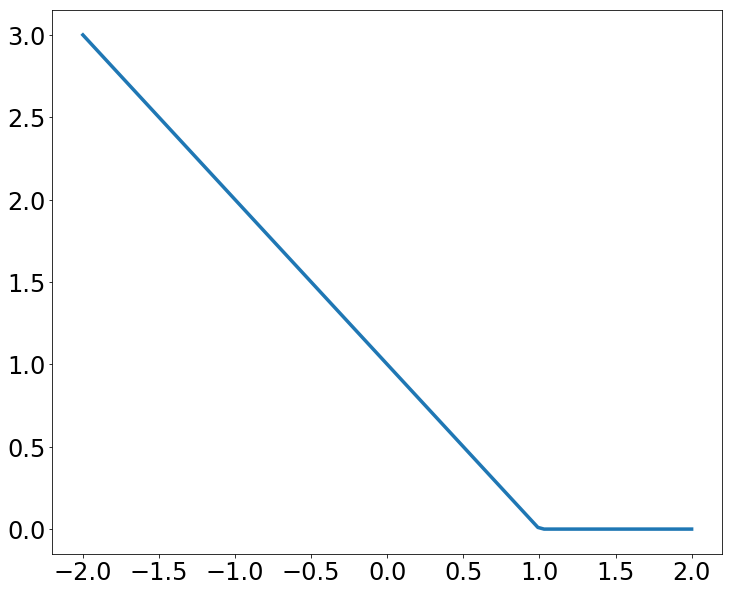

In [ ]:
z = np.linspace(-2, 2, 100)
plt.figure(figsize=(12,10))
plt.plot(z, hinge_loss(z), **kwargs)

In [ ]:
def hinge_subgradient(z):
    ###
    ### YOUR CODE
    ###
    return g

def svm_subgradient(A, y, x, alpha=0.1):
    g1 = hinge_subgradient(np.diag(y).dot(A.dot(x)))
    g2 = np.diag(y).dot(A)
    return g1.dot(g2) + alpha*x

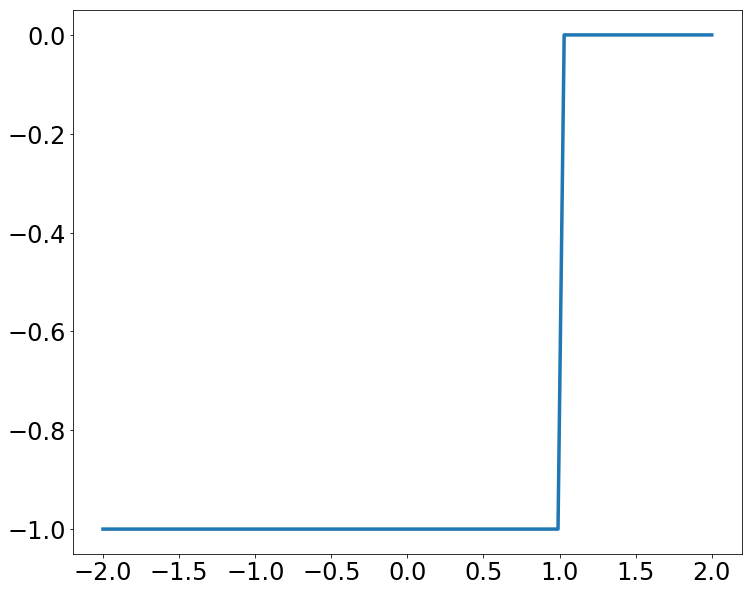

In [ ]:
plt.figure(figsize=(12,10))
plt.plot(z, hinge_subgradient(z), **kwargs)

In [ ]:
m, n = 1000, 100
A = np.vstack([np.random.normal(0.1, 1, (m//2, n)),
               np.random.normal(-0.1, 1, (m//2, n))])
y = np.hstack([np.ones(m//2), -1.*np.ones(m//2)])
x0 = np.random.normal(0, 1, n)
xs = gradient_descent(x0, [0.01]*100, 
                      lambda x: svm_subgradient(A, y, x, 0.05))

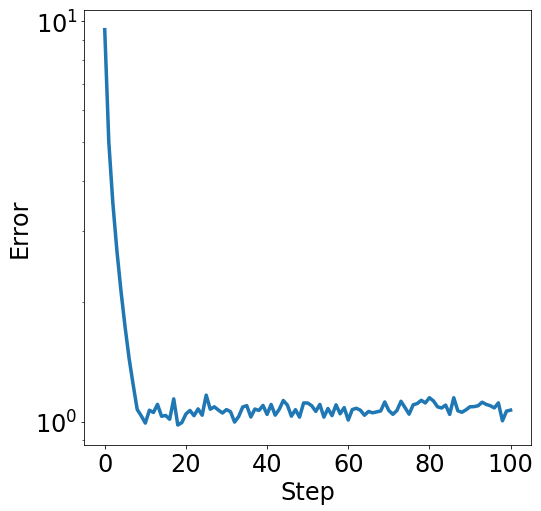

In [ ]:
error_plot([svm_objective(A, y, x) for x in xs])

Let's see if averaging out the solutions gives us an improved function value.

In [ ]:
xavg = 0.0
for x in xs:
    xavg += x
svm_objective(A, y, xs[-1]), svm_objective(A, y, xavg/len(xs))

(1.0714422960045327, 0.88151010653237649)

We can also look at the accuracy of our linear model for predicting the labels. From how we defined the data, we can see that the all ones vector is the highest accuracy classifier in the limit of infinite data (very large $m$). For a finite data set, the accuracy could be even higher due to random fluctuations.

In [ ]:
def accuracy(A, y, x):
    return np.mean(np.diag(y).dot(A.dot(x))>0)

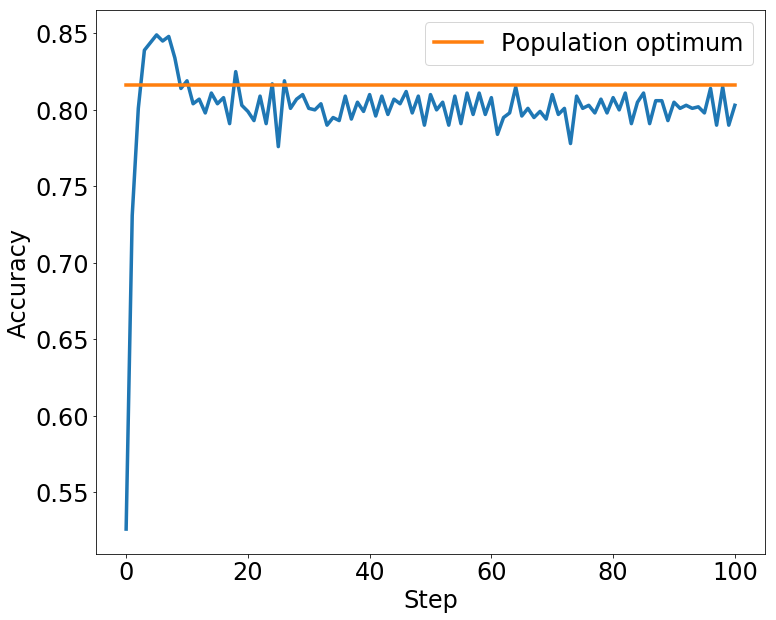

In [ ]:
plt.figure(figsize=(12,10))
plt.ylabel('Accuracy')
plt.xlabel('Step')
plt.plot(range(len(xs)), [accuracy(A, y, x) for x in xs], **kwargs)
plt.plot(range(len(xs)), [accuracy(A, y, np.ones(n))]*len(xs),
        label='Population optimum', **kwargs)
_ = plt.legend()

We see that the accuracy spikes pretty early and drops a bit as we train for too long.